<a href="https://colab.research.google.com/github/Heoquixote/Data_Scientist_Course/blob/main/titanic_ML_practice_20220713.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/titanic/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/titanic/test.csv")
print(train.shape, test.shape)

(891, 12) (418, 11)


In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### EDA

1. 데이터 크기 확인


2. 결측치 체크


3. dtype이 object인 column 확인


4. target distribution --> target value에 대한 분포 확인!

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


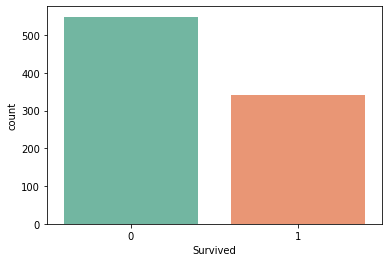

In [ ]:
sns.countplot(data=train, x="Survived", palette="Set2")

### pivot_table을 통한 EDA

- 특정 기준으로 데이터를 reconstruct하고 싶을 때. 

In [ ]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
pd.pivot_table(data=train, index=["Sex" ,"Pclass"],
               values=["Survived"],
               aggfunc=["mean", 'sum', 'count'])

mean      sum    count
               Survived Survived Survived
Sex    Pclass                            
female 1       0.968085       91       94
       2       0.921053       70       76
       3       0.500000       72      144
male   1       0.368852       45      122
       2       0.157407       17      108
       3       0.135447       47      347

### 2. 데이터 전처리

In [ ]:
# 0. 분석에 사용하지 않을 column 제거

## PassengerId, Name, Ticket, Cabin drop!!
train = train.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
# 1. 결측치 처리

## Age, Embarked
train.Age = train.Age.fillna(train.Age.mean())
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [ ]:
# 2. dtype이 object이 column 처리

## Embarked

## Pclass가 1이고, Sex가 female인 사람들이 가장 많이 탄 항구의 이름으로 결측치를 채워주세요!
train.loc[train.isnull().any(axis=1), "Embarked"] = train.loc[(train.Pclass == 1) & (train.Sex == 'female'), "Embarked"].mode()[0]

In [ ]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [ ]:
## categorical feature : Sex, Embarked

# 1. Ordinal Encoding
# from sklearn.preprocessing import OrdinalEncoder

# encoder = OrdinalEncoder()
# encoder2 = OrdinalEncoder()

# train.Sex = encoder.fit_transform(train["Sex"].values.reshape(-1, 1))
# train.Embarked = encoder2.fit_transform(train["Embarked"].values.reshape(-1, 1))
# train

# 2. One-hot Encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder2 = OneHotEncoder()

temp = encoder.fit_transform(train.Embarked.values.reshape(-1, 1)).toarray()
cols = ["embarked_"+col for col in encoder.categories_[0]]
embarked_OHE = pd.DataFrame(data=temp, columns=cols)
display(embarked_OHE)

temp2 = encoder2.fit_transform(train.Sex.values.reshape(-1, 1)).toarray()
cols2 = ["sex_"+col for col in encoder2.categories_[0]]
sex_OHE = pd.DataFrame(data=temp2, columns=cols2)
display(sex_OHE)

,embarked_C,embarked_Q,embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


,sex_female,sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


### 3. Training

In [ ]:
from sklearn.model_selection import train_test_split

X = pd.concat([train, embarked_OHE, sex_OHE], axis=1).drop(columns=["Survived", "Sex", "Embarked"])
y = train.Survived
# X_train = X
# y_train = y
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(712, 10) (179, 10) (712,) (179,)


In [ ]:
# from sklearn.linear_model import SGDClassifier # Linear Classfier
# from sklearn.svm import SVC # Support Vector machine Classifer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#clf = SGDClassifier()
#clf = SVC()
#clf = DecisionTreeClassifier()
clf = RandomForestClassifier(n_estimators=500,
                             max_features="auto",
                             min_samples_leaf=5,
                             min_samples_split=10,
                             random_state=0xC0FFEE)
clf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=10,
                       n_estimators=500, random_state=12648430)

### 4. Evaluation


- validation 데이터로 overfitting 같은 학습이 잘못되는 케이스를 확인.

In [ ]:
from sklearn.metrics import accuracy_score

pred = clf.predict(X_train)
pred2 = clf.predict(X_val)

print("Train accuracy : %.4f" % accuracy_score(y_train, pred))
print("Validation accuracy : %.4f" % accuracy_score(y_val, pred2))

Train accuracy : 0.8581
Validation accuracy : 0.8045


### 5. Prediction


- test 데이터 **train 데이터에 적용한 전처리 방식과 같은** 방법을 적용해주어야 합니다.

In [ ]:
# 1. column 제거
# 2. 결측치 처리 (Age, Embarked)
# 3. Ordinal Encoding
test = test.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [ ]:
# 2.
test.Age = test.Age.fillna(train.Age.mean())
test.Fare = test.Fare.fillna(train.Fare.mean())

In [ ]:
# One-hot Encoding
temp = encoder.transform(test.Embarked.values.reshape(-1, 1)).toarray()
cols = ["embarked_"+col for col in encoder.categories_[0]]
embarked_OHE = pd.DataFrame(data=temp, columns=cols)
display(embarked_OHE)

temp2 = encoder2.transform(test.Sex.values.reshape(-1, 1)).toarray()
cols2 = ["sex_"+col for col in encoder2.categories_[0]]
sex_OHE = pd.DataFrame(data=temp2, columns=cols2)
display(sex_OHE)

,embarked_C,embarked_Q,embarked_S
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
413,0.0,0.0,1.0
414,1.0,0.0,0.0
415,0.0,0.0,1.0
416,0.0,0.0,1.0


,sex_female,sex_male
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
413,0.0,1.0
414,1.0,0.0
415,0.0,1.0
416,0.0,1.0


In [ ]:
X_test = pd.concat([test, embarked_OHE, sex_OHE], axis=1).drop(columns=["Sex", "Embarked"])
result = clf.predict(X_test)
result

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/titanic/gender_submission.csv")
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission["Survived"] = result
submission.to_csv("submission.csv", index=False)